<a href="https://colab.research.google.com/github/wangyi111/GAN-in-practice/blob/master/08_UGATIT/pytorch/UGATIT_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My Drive/UGATIT-pytorch/

/content/drive/My Drive/UGATIT-pytorch


In [3]:
import torch
print(torch.__version__)
from PIL import Image
import os
import matplotlib.pyplot as plt

1.6.0+cu101


## Train (with colab, limited memory)
Set --light as True because we don't have enough memory in colab.

In [5]:
!python main.py --dataset selfie2anime --light True --iteration 1000 --save_freq 100

number of epochs must be larger than or equal to one

##### Information #####
# light :  True
# dataset :  selfie2anime
# batch_size :  1
# iteration per epoch :  1000

##### Generator #####
# residual blocks :  4

##### Discriminator #####
# discriminator layer :  6

##### Weight #####
# adv_weight :  1
# cycle_weight :  10
# identity_weight :  10
# cam_weight :  1000
training start !
[    1/ 1000] time: 2.6212 d_loss: 8.78576851, g_loss: 4979.46191406
[    2/ 1000] time: 3.5133 d_loss: 5.57837725, g_loss: 2871.71679688
[    3/ 1000] time: 4.4139 d_loss: 5.49802399, g_loss: 1680.58203125
[    4/ 1000] time: 5.3128 d_loss: 5.07762337, g_loss: 1675.87988281
[    5/ 1000] time: 6.2158 d_loss: 5.26223850, g_loss: 1402.11560059
[    6/ 1000] time: 7.1171 d_loss: 5.10729408, g_loss: 1408.68493652
[    7/ 1000] time: 8.0188 d_loss: 4.88229847, g_loss: 1402.38317871
[    8/ 1000] time: 8.9209 d_loss: 4.99433470, g_loss: 1406.72143555
[    9/ 1000] time: 9.8211 d_loss: 4.58957815, g_loss: 1415

## Test (with colab) 
Set --light as True in consistence with the trained model.

In [6]:
!python main.py --dataset selfie2anime --phase test --light True

number of epochs must be larger than or equal to one

##### Information #####
# light :  True
# dataset :  selfie2anime
# batch_size :  1
# iteration per epoch :  1000000

##### Generator #####
# residual blocks :  4

##### Discriminator #####
# discriminator layer :  6

##### Weight #####
# adv_weight :  1
# cycle_weight :  10
# identity_weight :  10
# cam_weight :  1000
 [*] Load SUCCESS
 [*] Test finished!


## Train (with pretrained checkpoint)
Do this only if the memory size is big enough. Put the provided checkpoint (50/100 epochs) in the checkpoint folder.

In [ ]:
!python main.py --dataset selfie2anime

## Test (with pretrained checkpoint)


In [ ]:
!python main.py --dataset selfie2anime --phase test

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



2020-09-25 13:42:05.493908: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2020-09-25 13:42:05.494235: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1546d80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-09-25 13:42:05.494271: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-09-25 13:42:05.509380: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-09-25 13:42:05.585396: I tensorflow/stream_executor/cuda

## Check the results

Text(0.5, 1.0, 'testB')

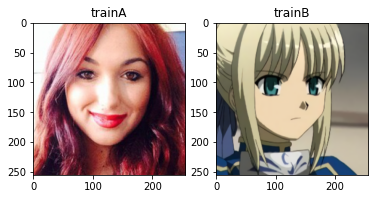

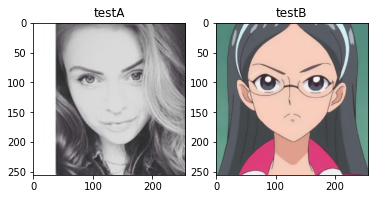

In [9]:


dir = 'dataset/selfie2anime/'

img_trainA = Image.open(os.path.join(dir,'trainA/female_222.jpg'))
img_trainB = Image.open(os.path.join(dir,'trainB/0006.png'))
img_testA = Image.open(os.path.join(dir,'testA/female_2321.jpg'))
img_testB = Image.open(os.path.join(dir,'testB/3414.png'))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_trainA)
plt.title('trainA')
plt.subplot(1,2,2)
plt.imshow(img_trainB)
plt.title('trainB')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_testA)
plt.title('testA')
plt.subplot(1,2,2)
plt.imshow(img_testB)
plt.title('testB')

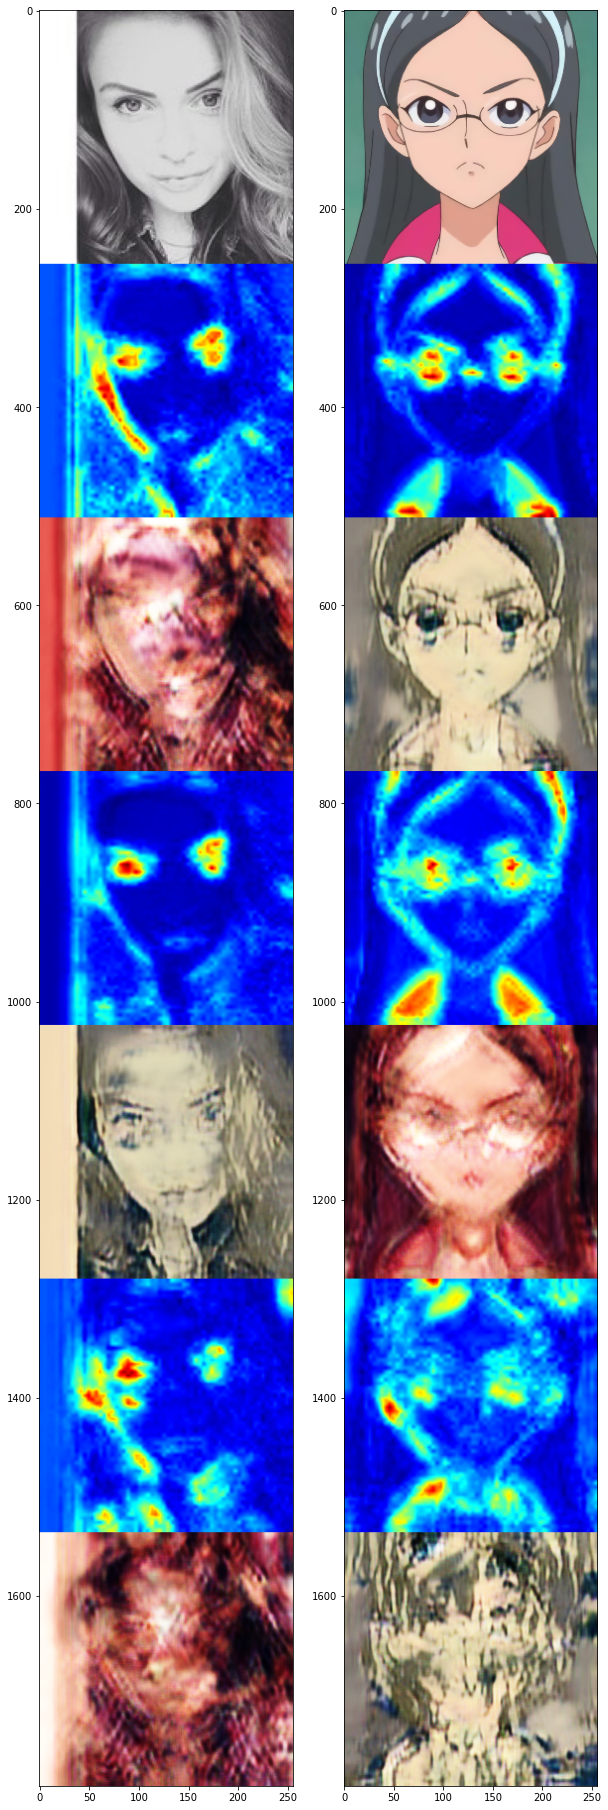

In [12]:
out_dir = './results/selfie2anime/test/'
img_testA_out = Image.open(os.path.join(out_dir,'A2B_1.png'))
img_testB_out = Image.open(os.path.join(out_dir,'B2A_1.png'))

plt.figure(figsize=(10,70))
plt.subplot(1,2,1)
plt.imshow(img_testA_out)
plt.subplot(1,2,2)
plt.imshow(img_testB_out)
plt.show()